In [1]:
library('tidyverse')
library('rvest')
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

In [3]:
df.marathon  %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [3]:
df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | ? |
| color | ? |
| facet value | ? |

### Filled in Table
- The X value is year 
- The Y value is race.time 
- The color is country.simple
- The facet value is MF

Make note of other aesthetic decisions. 
- What's the y-axis title? 
It is Winning Time
- Do the two charts share the same x-axis bounds? 
They do not share the same ticks (scales = free)
- Is there a legend? 
There is not a legend

Code your version of the chart below.

In [18]:
library("ggrepel")

In [56]:
#Building a table to use in creating the coloring used in the table
    #feed this table in geom_text_repel to get the labeling we want below

label_table = data.frame(
    country.simple = c('United States', 
                       'United States', 
                       'Kenya', 
                       'Kenya',
                       'Ethiopia',
                       'Japan'),
    MF = c("Men's", "Women's", "Men's", "Women's", "Women's", "Men's"),
    year = c(1915, 1975, 1990, 2010, 1995, 1955),
    race.time = c(2.75, 3, 2, 2.25, 2.5, 2.25)
)

label_table

country.simple,MF,year,race.time
<chr>,<chr>,<dbl>,<dbl>
United States,Men's,1915,2.75
United States,Women's,1975,3.00
Kenya,Men's,1990,2.00
Kenya,Women's,2010,2.25
Ethiopia,Women's,1995,2.50
Japan,Men's,1955,2.25


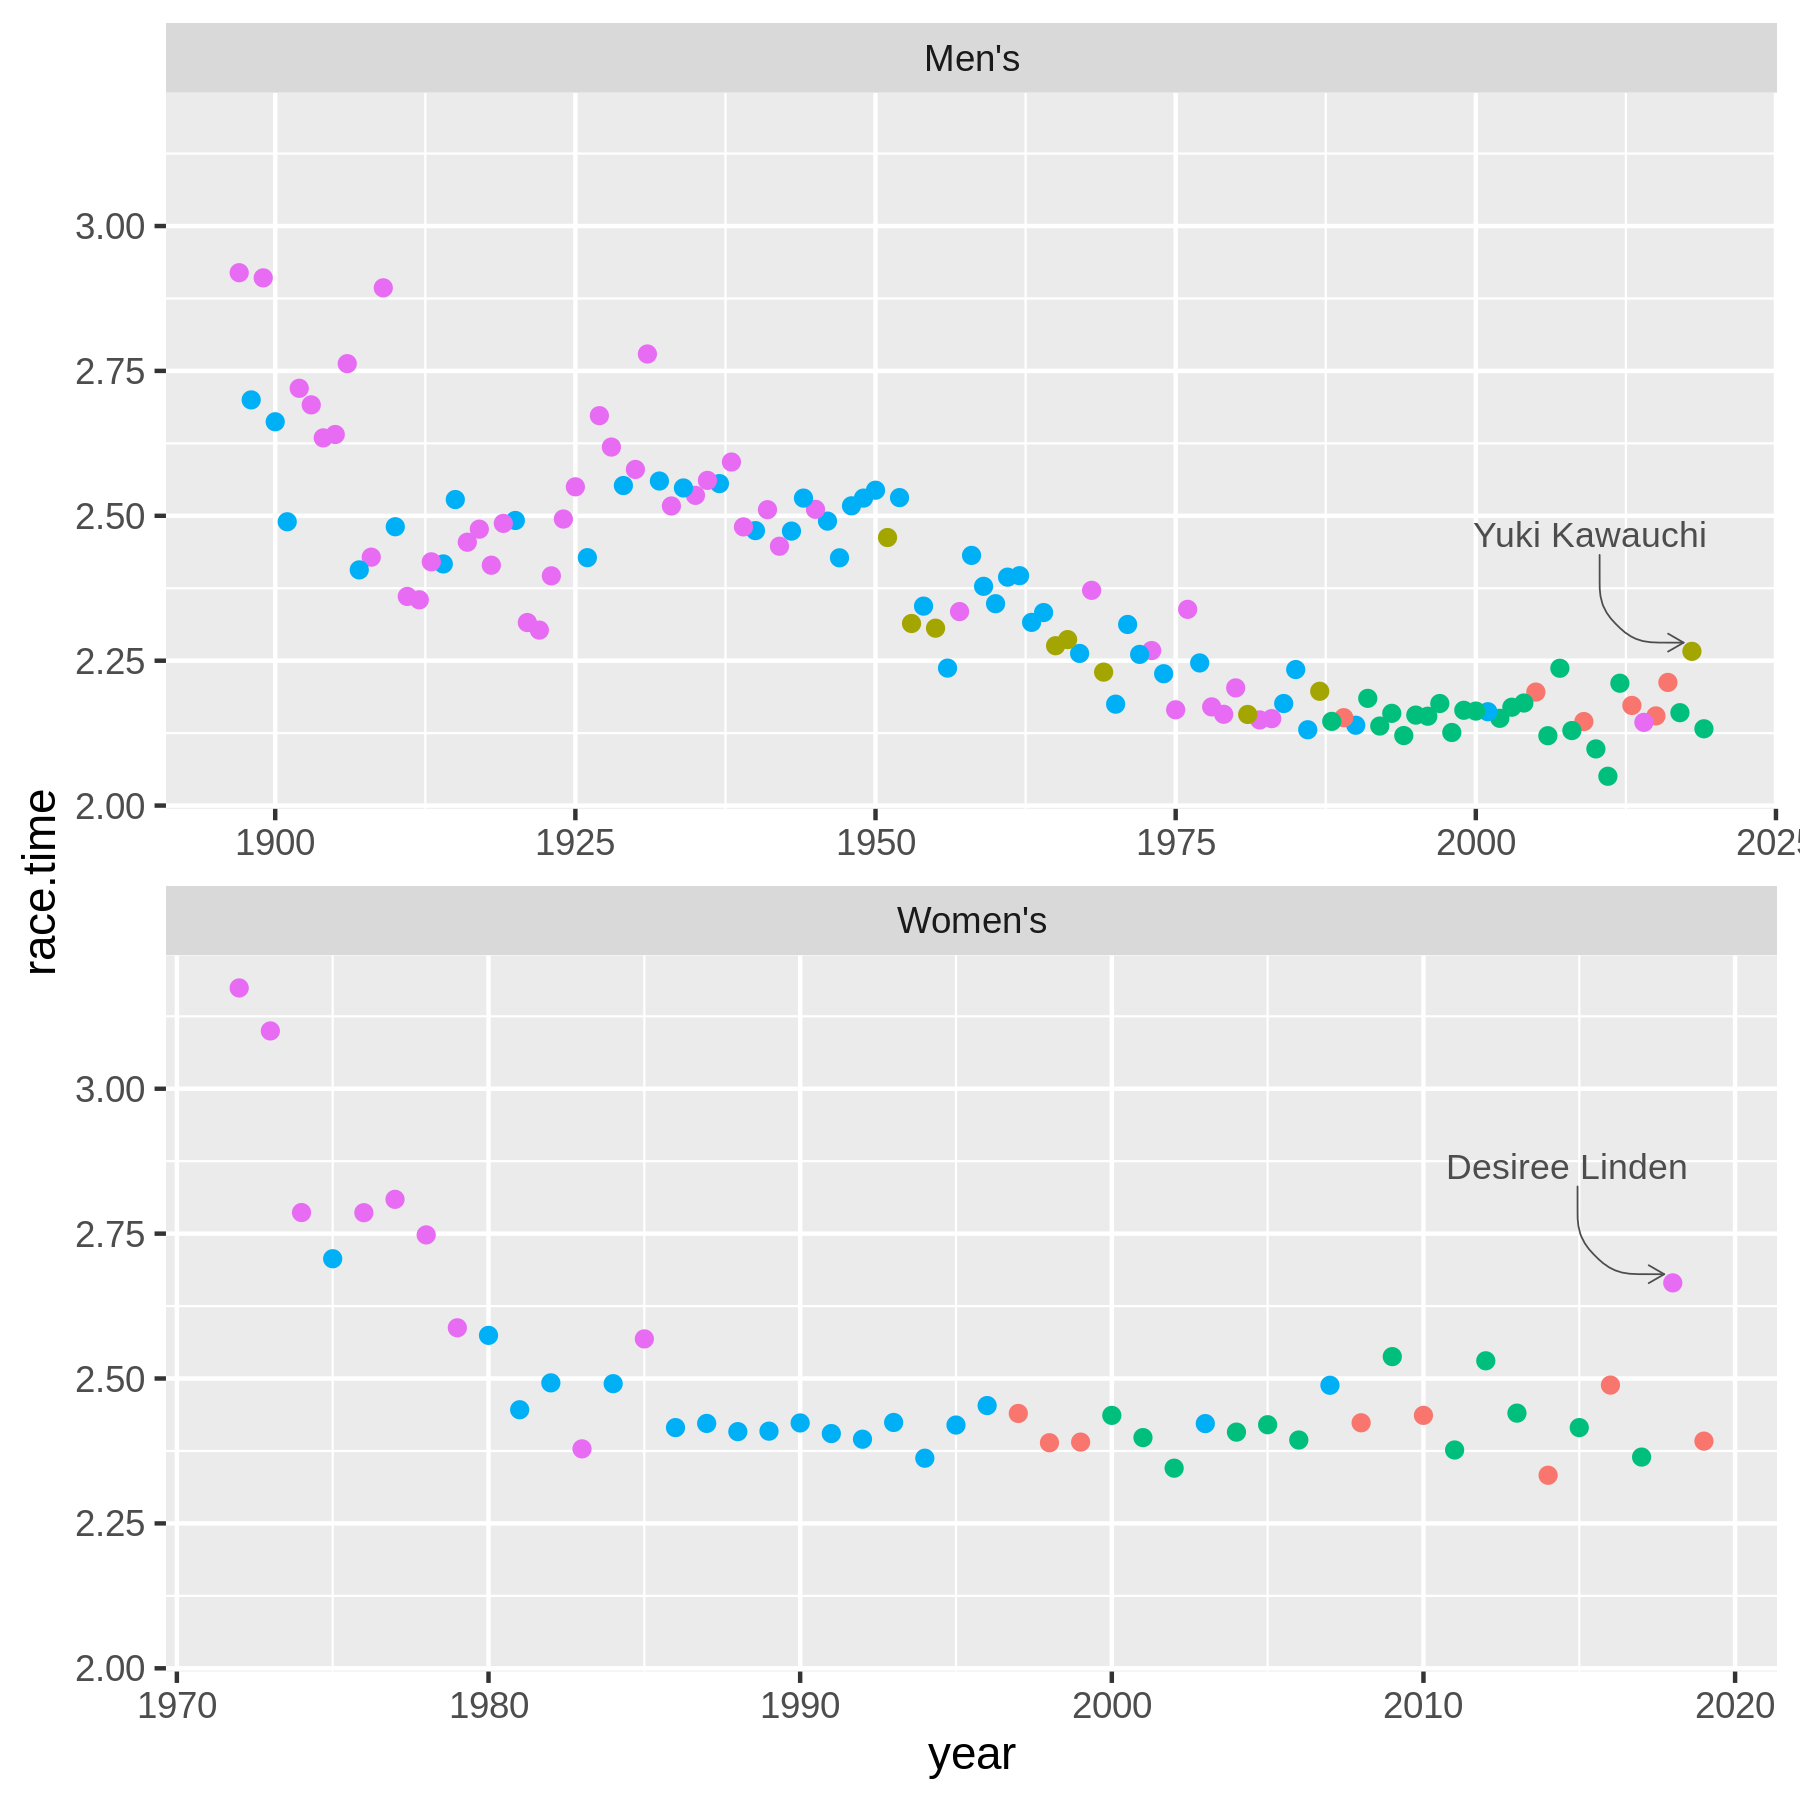

In [49]:
p = ggplot(df.marathon, 
           aes(y = race.time, x = year, color = country.simple, label = name))
#country.simple are all of the low country value times, and this is what they used in the previous plot

p = p + geom_point()

p = p + facet_wrap(~MF, ncol = 1, scales = "free_x")

#the code below will work for creating the filter on the one variable we need, but we will show how to do this also
    #using ggrepel library and calling geom_text_repel instead
#p = p + geom_text(data = df.marathon %>% filter(year == 2018))
#When making a comparison between values, we have to use two equal signs because if we use 1 equal sign it sets those
    #values equal to each other

p = p + geom_text_repel(data = df.marathon   %>% filter (year == 2018),
                       nudge_y = .2,
                       segment.size = .2,
                       size =3,
                       hjust = "right",
                       color = "grey30",
                       segment.curvature = .667,
                       segment.ncp = 2,
                       arrow = arrow(length = unit(.025, "npc")),
                       point.padding = .5
                       )

p = p + theme(legend.position = "none")
#this get rids of the attachment of colors to specific countries by legend so we can add the specifics found in the table
    #we created above

p


#on the next code we will be modifying all of this

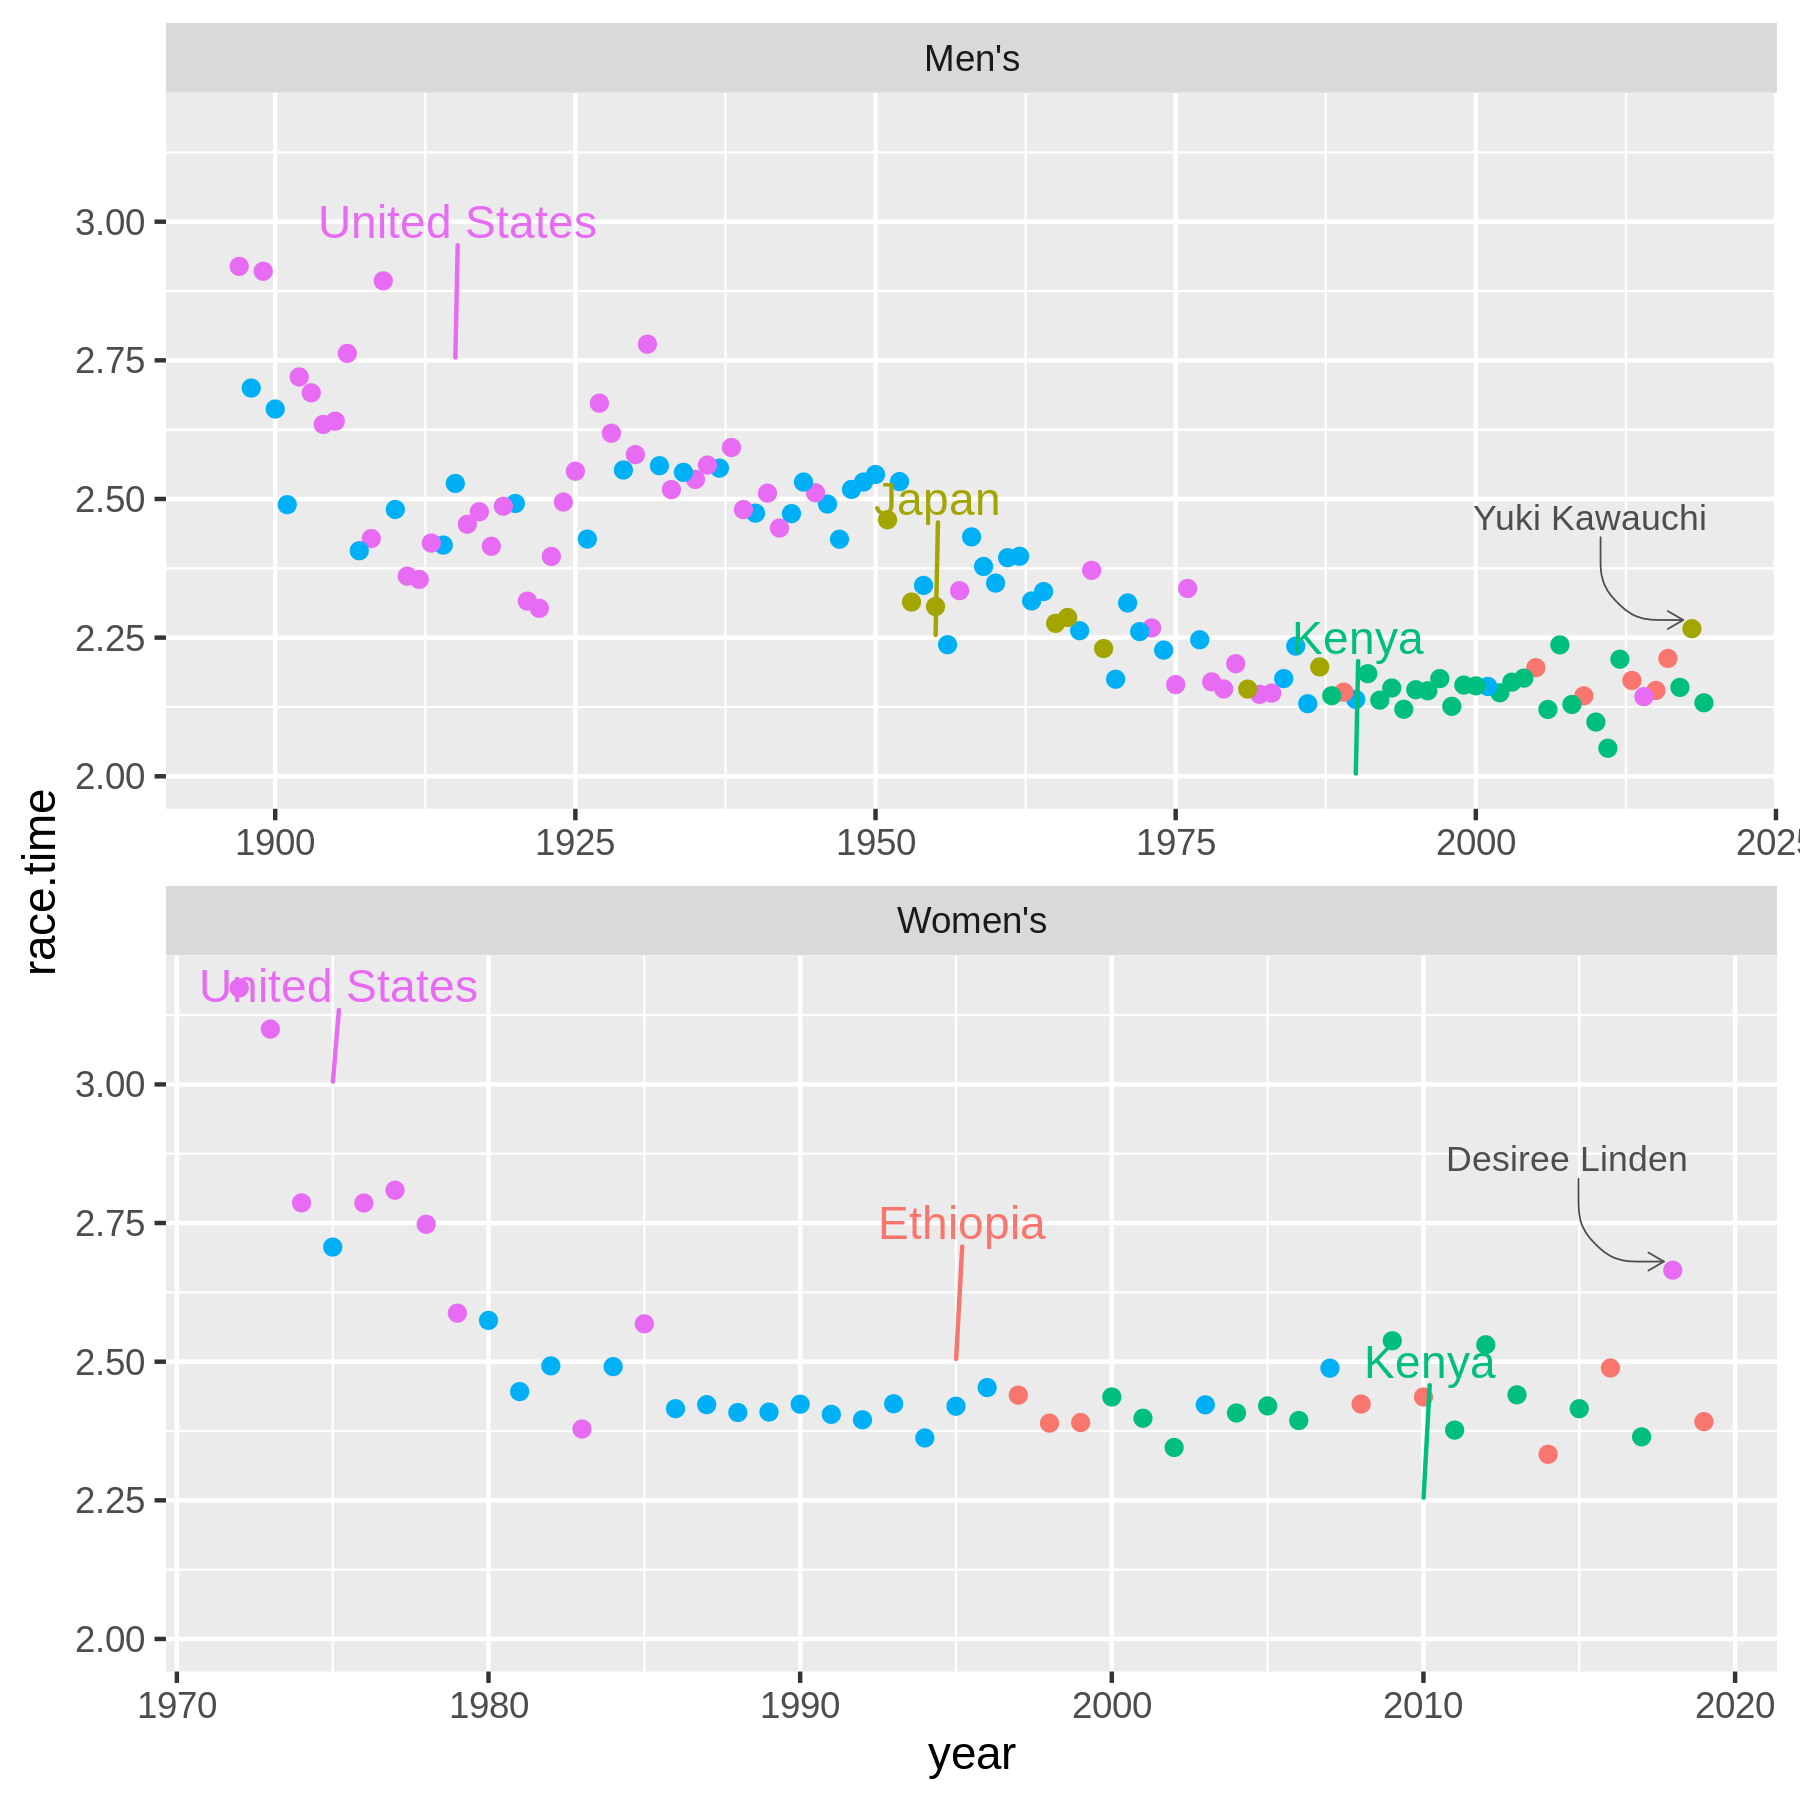

In [57]:
p = ggplot(df.marathon, 
           aes(y = race.time, x = year, color = country.simple, label = name))
#country.simple are all of the low country value times, and this is what they used in the previous plot

p = p + geom_point()

p = p + facet_wrap(~MF, ncol = 1, scales = "free_x")

#the code below will work for creating the filter on the one variable we need, but we will show how to do this also
    #using ggrepel library and calling geom_text_repel instead
#p = p + geom_text(data = df.marathon %>% filter(year == 2018))
#When making a comparison between values, we have to use two equal signs because if we use 1 equal sign it sets those
    #values equal to each other

p = p + geom_text_repel(data = df.marathon   %>% filter (year == 2018),
                       nudge_y = .2,
                       segment.size = .2,
                       size =3,
                       hjust = "right",
                       color = "grey30",
                       segment.curvature = .667,
                       segment.ncp = 2,
                       arrow = arrow(length = unit(.025, "npc")),
                       point.padding = .5
                       )

p = p + geom_text_repel(data = label_table,
                        mapping = aes(label = country.simple),
                        nudge_y = .25, nudge_x = .2)

p = p + theme(legend.position = "none")
#this get rids of the attachment of colors to specific countries by legend

p

In [58]:
df.marathon  %>% 
    group_by(MF, country.simple)  %>% 
    summarize(rt_mean = mean(race.time), y_mean = mean(year))

#this is creating a standardized location for where the labels of years should go

`summarise()` has grouped output by 'MF'. You can override using the `.groups` argument.



MF,country.simple,rt_mean,y_mean
<chr>,<chr>,<dbl>,<dbl>
Men's,Ethiopia,2.172083,2007.833
Men's,Japan,2.277315,1971.667
Men's,Kenya,2.151086,2001.909
Men's,other,2.401118,1948.952
Men's,United States,2.474678,1935.091
Women's,Ethiopia,2.411597,2007.625
Women's,Kenya,2.422199,2007.917
Women's,other,2.453333,1989.611
Women's,United States,2.760250,1981.500


What else might you visualize with this data? (e.g. What about totaling the winners from each country?)